<a href="https://colab.research.google.com/github/Fis428/PC03/blob/main/EX04_05_%E8%BE%A8%E8%AD%98%E9%B3%B6%E5%B0%BE%E8%8A%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: flo

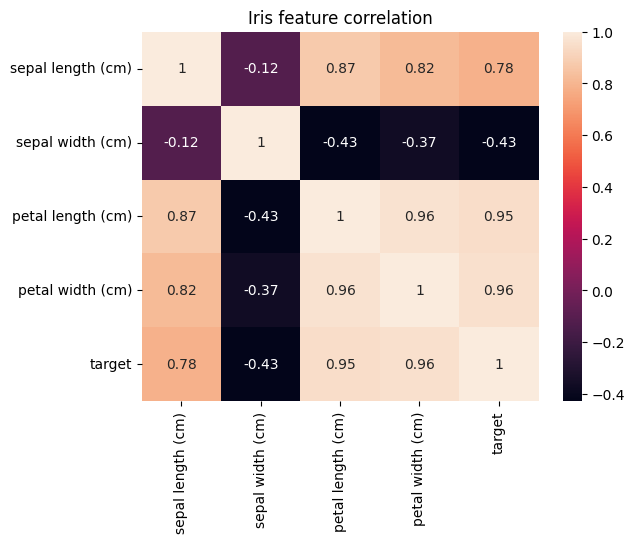

Training score: 0.9583333333333334 

Test  accuracy: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Best params: {'n_neighbors': 3, 'weights': 'uniform'}
Best CV  score: 0.95 

The predicted class is: [0]
The predicted iris species is: setosa


In [ ]:
# ------------------------------
# 1. 載入套件與資料
# ------------------------------
from sklearn.datasets    import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing  import StandardScaler
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.metrics        import accuracy_score, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# 資料收集
iris = load_iris(as_frame=True)
X, y = iris.data, iris.target
df   = iris.frame

# 檢視前五筆
print(df.head(), "\n")

# ------------------------------
# 2. 資料前處理 & 探索性分析
# ------------------------------
# 資料資訊
df.info()
print("\n")

# 敘述性統計
print(df.describe(), "\n")

# 計算相關係數矩陣
df_corr = df.corr()
print(df_corr, "\n")

# 畫出相關係數熱圖
sns.heatmap(df_corr, annot=True)
plt.title("Iris feature correlation")
plt.show()

# ------------------------------
# 3. 切分資料
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# 4. 特徵縮放
# ------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# ------------------------------
# 5. 模型訓練
# ------------------------------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("Training score:", knn.score(X_train, y_train), "\n")

# ------------------------------
# 6. 模型評估
# ------------------------------
y_pred = knn.predict(X_test)
print("Test  accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

# ------------------------------
# 7. 模型調整 (GridSearchCV)
# ------------------------------
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights':     ['uniform', 'distance']
}
grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5
)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV  score:", grid.best_score_, "\n")

# ------------------------------
# 8. 儲存模型 & scaler
# ------------------------------
joblib.dump(knn,    'knn_model.pkl')
joblib.dump(scaler, 'scaler_model.pkl')

# ------------------------------
# 9. 推論預測範例
# ------------------------------
# 載入
loaded_knn    = joblib.load('knn_model.pkl')
loaded_scaler = joblib.load('scaler_model.pkl')

# 範例資料
data = {
    'sepal length (cm)': [5.1],
    'sepal width (cm)':  [3.5],
    'petal length (cm)': [1.4],
    'petal width (cm)':  [0.2],
}
virtual_df = pd.DataFrame(data)

# 標準化 + 預測
virtual_df = loaded_scaler.transform(virtual_df)
prediction = loaded_knn.predict(virtual_df)

print("The predicted class is:", prediction)
print("The predicted iris species is:", iris.target_names[prediction[0]])
